# Goals for this analysis:
### Core goal: Practice web-scraping
### 1) Understand overall dialogue ditribution across the series by character
### 2) Understand how dialogue distribution evolves across episodes and seasons
### 3) Understand how many times Zuko says "honor" (and if anyone else says it more)

In [5]:
import requests, urllib, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sb
from bs4 import BeautifulSoup
import time

## First thing's first: we need to compile our dataset. I found a great repository of ATLA transcripts at atla.avatarpsirit.net and used the beautiful soup library to import the count of lines per episode, using pandas to store and export the results into a dataframe.

In [2]:
atla_ep_data = []
episode_key = "101"
count = 1
gaang = ["Aang", "Katara", "Sokka", "Suki", "Toph", "Zuko", "Mai", "Ty Lee", "Azula", "Iroh"]

while int(episode_key) < 400:
    season = episode_key[0]
    ep = episode_key[1:]
    ep_stats = {"Season": season, "Episode": ep}
    
    url = f"http://atla.avatarspirit.net/transcripts.php?num={episode_key}"
    print(url)
    page = requests.get(url)
    page_soup = BeautifulSoup(page.content, 'html.parser')

    #if len(page_soup.find_all('title', string = "Error :: AvatarSpirit.net") ) > 0:
    if len(page_soup.find_all("div", {"class": "welcome"}, text = "Error")) > 0:
        episode_key = str(int(episode_key) + 101 - int(episode_key[1:]))
        pass
    else:
        for character in gaang:
            ep_stats[character] = len(page_soup.find_all('b', string = [character, character+":"]))
        atla_ep_data.append(ep_stats)
        episode_key = str(int(episode_key)+1)
        count += 1
            
print (f"Finished parsing all episodes. Total number counted: {count-1} / 61")
del count

http://atla.avatarspirit.net/transcripts.php?num=101
http://atla.avatarspirit.net/transcripts.php?num=102
http://atla.avatarspirit.net/transcripts.php?num=103
http://atla.avatarspirit.net/transcripts.php?num=104
http://atla.avatarspirit.net/transcripts.php?num=105
http://atla.avatarspirit.net/transcripts.php?num=106
http://atla.avatarspirit.net/transcripts.php?num=107
http://atla.avatarspirit.net/transcripts.php?num=108
http://atla.avatarspirit.net/transcripts.php?num=109
http://atla.avatarspirit.net/transcripts.php?num=110
http://atla.avatarspirit.net/transcripts.php?num=111
http://atla.avatarspirit.net/transcripts.php?num=112
http://atla.avatarspirit.net/transcripts.php?num=113
http://atla.avatarspirit.net/transcripts.php?num=114
http://atla.avatarspirit.net/transcripts.php?num=115
http://atla.avatarspirit.net/transcripts.php?num=116
http://atla.avatarspirit.net/transcripts.php?num=117
http://atla.avatarspirit.net/transcripts.php?num=118
http://atla.avatarspirit.net/transcripts.php?n

In [3]:
df = pd.DataFrame(atla_ep_data)
df[df["Season"] == "3"]

,Season,Episode,Aang,Katara,Sokka,Suki,Toph,Zuko,Mai,Ty Lee,Azula,Iroh
40,3,01,37,30,18,0,10,11,2,0,10,0
41,3,02,53,14,18,0,8,10,3,0,5,0
42,3,03,24,27,28,0,9,0,0,0,0,0
43,3,04,22,20,41,0,13,0,0,0,0,0
44,3,05,4,2,1,0,4,39,22,26,37,0
45,3,06,16,4,3,0,3,9,0,0,3,4
46,3,07,18,50,31,0,58,0,0,0,0,0
47,3,08,20,35,35,0,15,0,0,0,0,0
48,3,09,58,26,22,0,10,17,9,0,5,0
49,3,10,22,18,26,0,7,2,0,0,0,4


# Goal 1: Overall Dialogue distribution

## dataset: check
## bargraph: locked and loaded

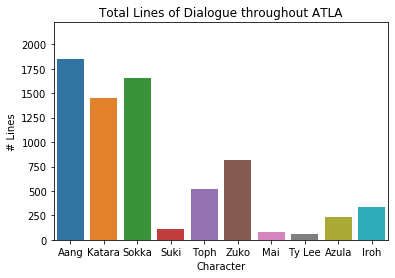

In [6]:
total_dialogue = sb.barplot(data = df[gaang], estimator = np.sum, errwidth = 0)
total_dialogue.set_title("Total Lines of Dialogue throughout ATLA")
total_dialogue.set_ylabel("# Lines")
total_dialogue.set_xlabel("Character");

# Goal 2: Dialogue evolution

## We've already got the dataset, but evolution of multiple elements over time is best shown with a multi-line plot. I originally tried to map the results for every character onto a single graph, but that proved...chaotic. I settled on mapping the Core 4 for the public analysis.

## A line plot is a line plot, but matplotlib provides multiple ways to display plots. I wanted all 3 seasons plotted in a single figure, so I used the subplot method. Now to decide if I want a 1x3 or a 3x1 grid...

#### Unfortunately, the horizontal 1,3 matrix isn't very legible given laptop screen size (see below)...

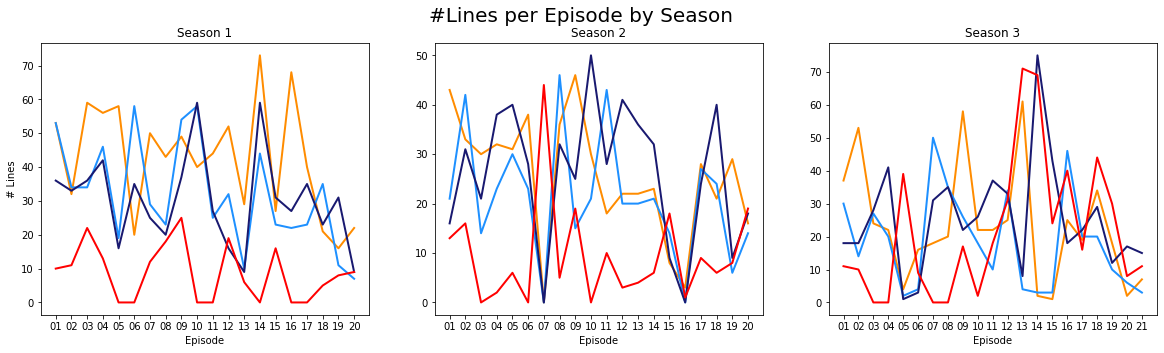

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,5))
fig.suptitle("#Lines per Episode by Season", fontsize = 20)

seas = 0

for ax in [ax1, ax2, ax3]:
    seas += 1
    for char, col in list(zip("Aang Katara Sokka Zuko".split(" "), "darkorange dodgerblue midnightblue red".split(" "))):
        ax.plot( "Episode", char, data=df[df["Season"]==str(seas)], marker='', color=col, linewidth=2)
        ax.set_title(f"Season {seas}")
        ax.set_xlabel("Episode")

ax1.set_ylabel("# Lines");

#### ...so we'll use a vertical stack instead

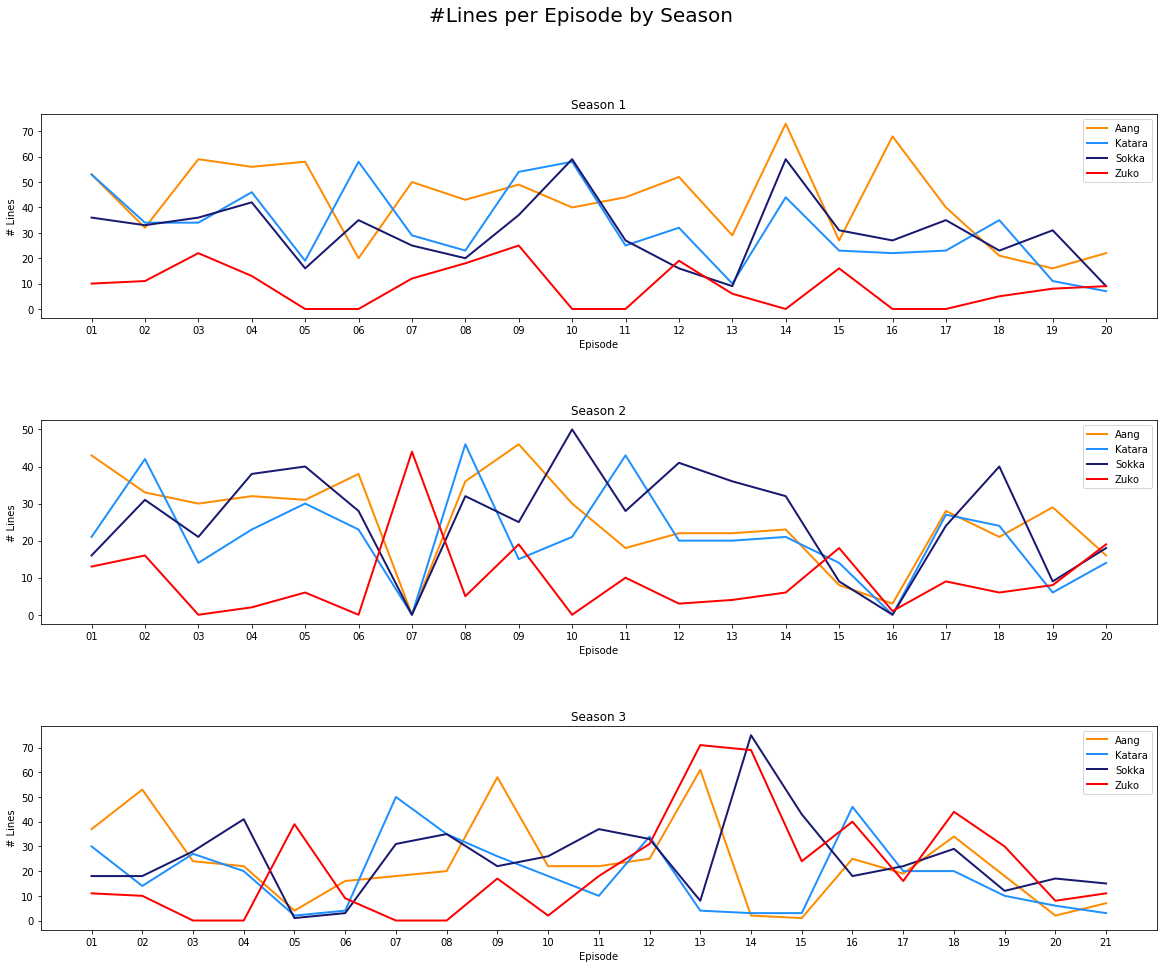

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize = (20,15))
fig.suptitle("#Lines per Episode by Season", fontsize = 20)

seas = 0

for ax in [ax1, ax2, ax3]:
    seas += 1
    for char, col in list(zip("Aang Katara Sokka Zuko".split(" "), "darkorange dodgerblue midnightblue red".split(" "))):
        ax.plot( "Episode", char, data=df[df["Season"]==str(seas)], marker='', color=col, linewidth=2)
        ax.set_title(f"Season {seas}")
        ax.set_xlabel("Episode")
        ax.set_ylabel("# Lines")
        ax.legend()

fig.subplots_adjust(hspace=0.5);

#### It's cool to see how Zuko normalizes with the rest of the Gaang in season 3!

# Goal 3: Honor Guard

## This is tricky, since if you read the documentation for the original dataset, you'll realize I was quite literally only counting the number of lines of dialogue per character (made easy since I noticed the web pages only bolded the character names when designating line speakers). I'll have to find a new way to track the speaker AND capture the dialogue...

In [ ]:
episode_key = "104"
url = f"http://atla.avatarspirit.net/transcripts.php?num={episode_key}"
print(url)
page = requests.get(url)
page_soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
for tag in page_soup.find_all("b", text = True):
    print(tag.get_text())
    #print (tag.next_sibling)

In [ ]:
page_soup